# Capstone project two (Exploratory Data Analysis)

## 1. Importing the necessary libraries and loading the dataframe

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os
from scipy import stats

In [2]:
# Load the dataset
df_EDA = pd.read_csv('..\Dataset\df_EDA.csv', index_col=0)
df_EDA.head()

,Attrition_Flag,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3.0,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5.0,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3.0,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4.0,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3.0,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# Make 'Dependent_Count' column as dtypes 'int64'
df_EDA['Dependent_Count'] = df_EDA['Dependent_Count'].astype('int64')

In [4]:
df_EDA['Dependent_Count'].value_counts()

3    2729
2    2658
1    1837
4    1570
0     902
5     424
Name: Dependent_Count, dtype: int64

## 2. Numeric EDA

In [5]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10120 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10120 non-null  object 
 1   Age                       10120 non-null  int64  
 2   Gender                    10120 non-null  object 
 3   Dependent_Count           10120 non-null  int64  
 4   Education                 10120 non-null  object 
 5   Marital_Status            10120 non-null  object 
 6   Income                    10120 non-null  object 
 7   Card_Category             10120 non-null  object 
 8   Months_On_Book            10120 non-null  int64  
 9   Total_Relationship_Count  10120 non-null  int64  
 10  Months_Inactive           10120 non-null  int64  
 11  Contacts_Count            10120 non-null  int64  
 12  Credit_Limit              10120 non-null  float64
 13  Total_Revolving_Bal       10120 non-null  int64  
 14  Avg_Op

In [6]:
df_EDA.describe()

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,46.325099,2.345850,35.927569,3.812945,2.341502,2.455632,8629.456235,1162.238142,7467.218093,0.759766,4402.463241,64.860178,0.712218,0.274851
std,8.017044,1.298418,7.986994,1.554330,1.010752,1.105381,9086.657280,814.895945,9088.819145,0.217667,3394.031694,23.462913,0.238062,0.275713
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2554.500000,355.500000,1323.500000,0.631000,2156.000000,45.000000,0.582000,0.022000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.500000,0.736500,3899.000000,67.000000,0.702000,0.175500
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11063.250000,1783.000000,9855.500000,0.859000,4740.250000,81.000000,0.818000,0.502250
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
# Percent customer attrition
df_EDA.Attrition_Flag.value_counts(normalize=True)

Existing Customer    0.839427
Attrited Customer    0.160573
Name: Attrition_Flag, dtype: float64

## 3. Observing the distribution of values in numeric columns

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Dependent_Count'}>,
        <AxesSubplot:title={'center':'Months_On_Book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive'}>,
        <AxesSubplot:title={'center':'Contacts_Count'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

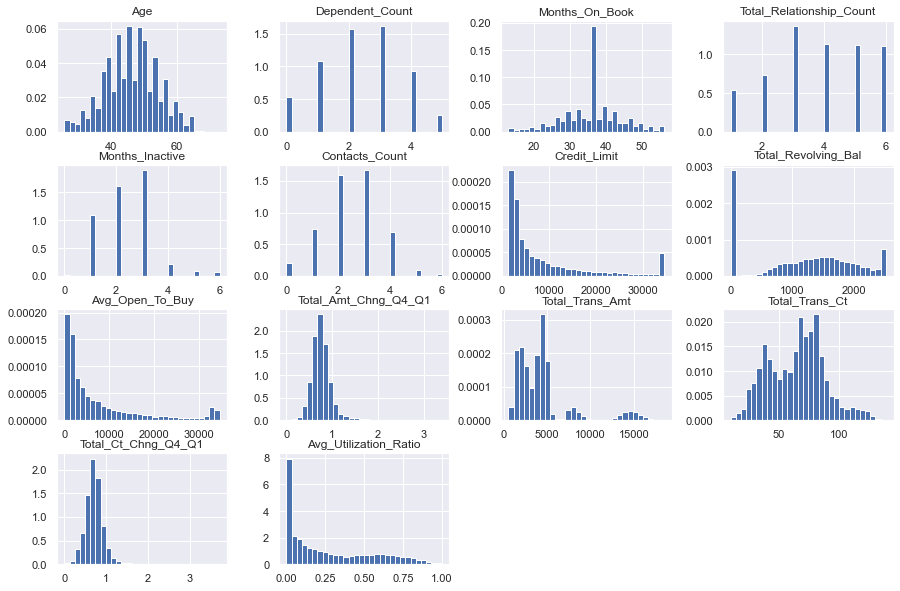

In [8]:
# Inspecting the distribution of data by using histogram
df_EDA.hist(bins=30, figsize=(15,10), density=True)

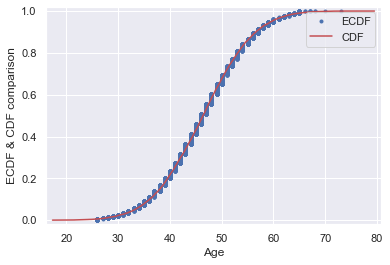

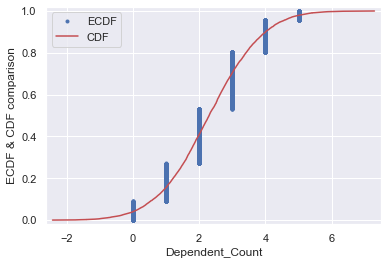

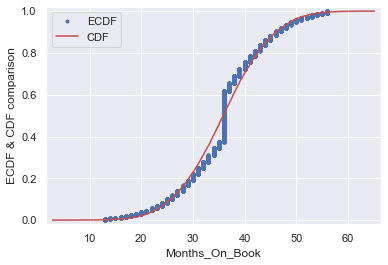

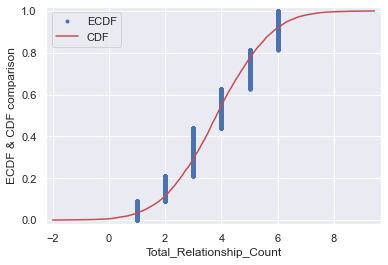

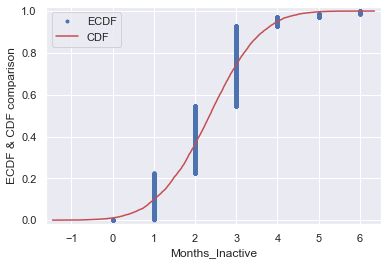

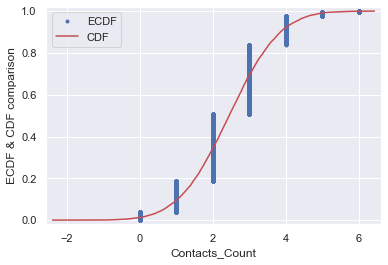

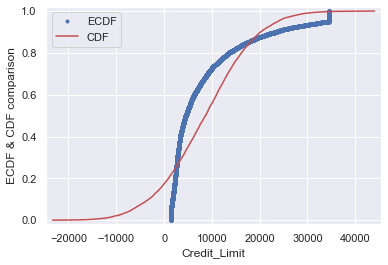

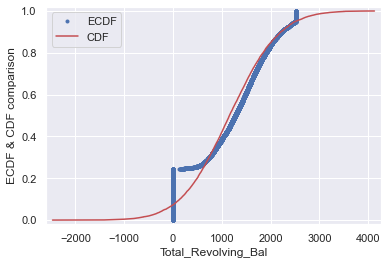

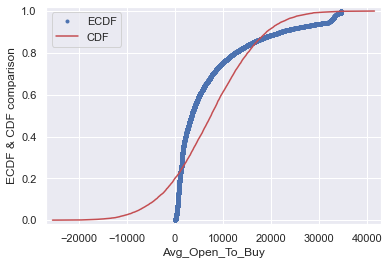

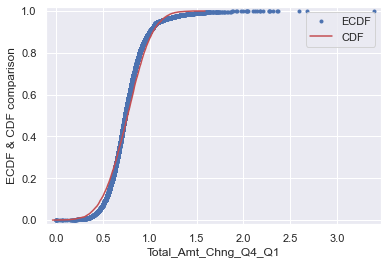

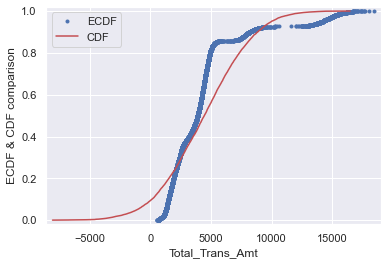

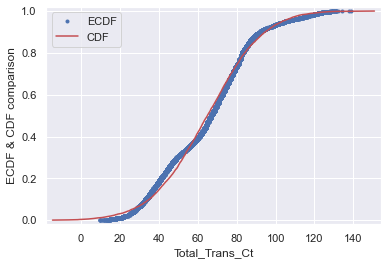

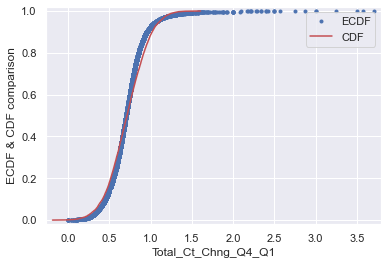

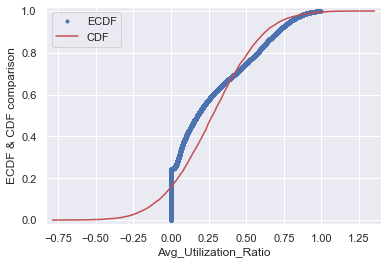

None


In [9]:
# Visualizing ECDF plots and theoritical CDF plot to check normality of different columns distribution
def ecdf_cdf_comparison(df, col_list):
    """
    ecdf & plots to see the distribution of column values
    """
    for col in col_list:
        # Computing and plotting ECDF
        x = np.sort(df[col])
        y = np.arange(1, len(x)+1)/len(x)
        plt.plot(x,y, marker='.', linestyle='none', color='b', label='ECDF')
        plt.xlabel(col)
        plt.ylabel('ECDF & CDF comparison')
        # Computing and plotting theoritical CDF
        mean = df[col].mean()
        std = df[col].std()
        sample = np.random.normal(mean, std, size=9307)
        x_theor = np.sort(sample)
        y_theor = np.arange(1, len(x_theor)+1)/len(x_theor)
        plt.plot(x_theor,y_theor, color='r', label='CDF')
        plt.margins(0.02)
        plt.legend()
        plt.show()
result = ecdf_cdf_comparison(df_EDA, df_EDA.select_dtypes('number').columns)
print(result)

## 4. Visualizing, detecting, and removing outliers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count'>

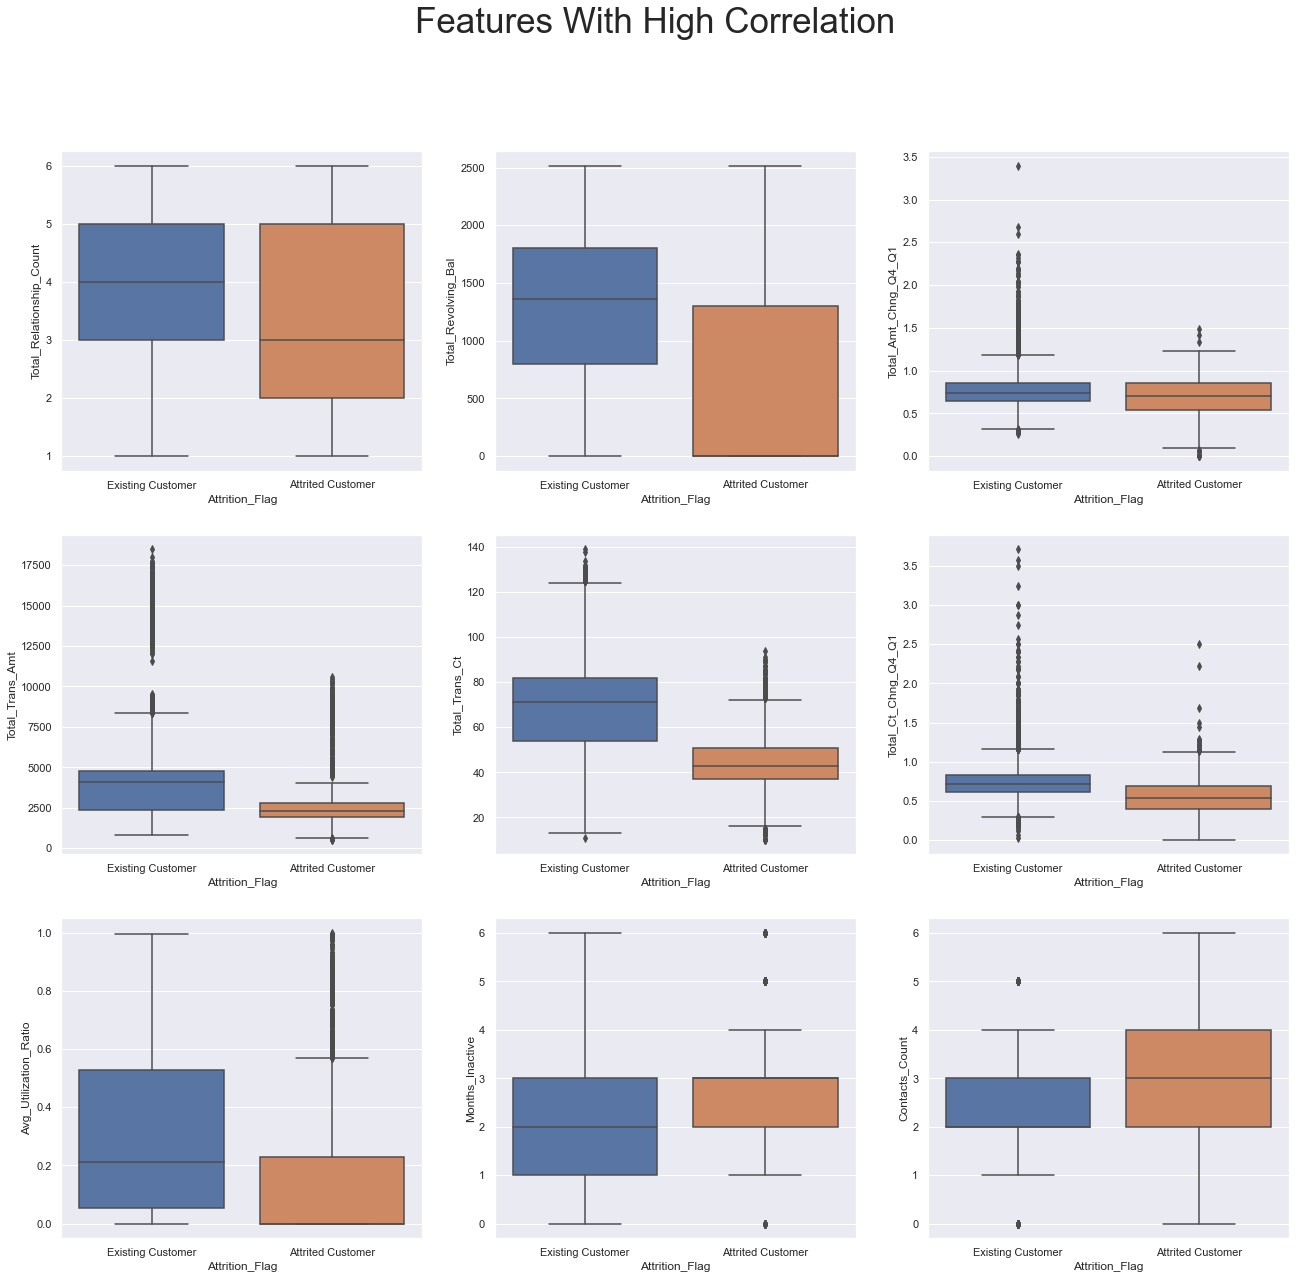

In [10]:
#visualizing the features whigh positive and negative correlation
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(22,20))
figure.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=df_EDA, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df_EDA, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df_EDA, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df_EDA, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df_EDA, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=df_EDA, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df_EDA, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive", data=df_EDA, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count", data=df_EDA, ax=axes[2,2])

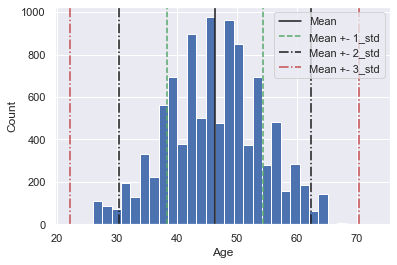

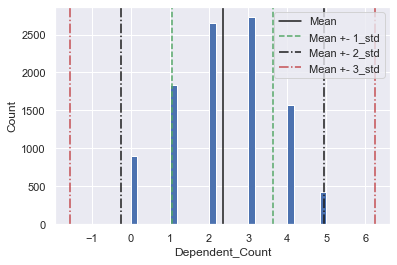

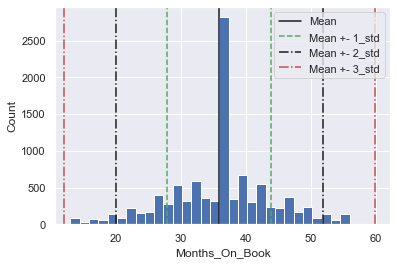

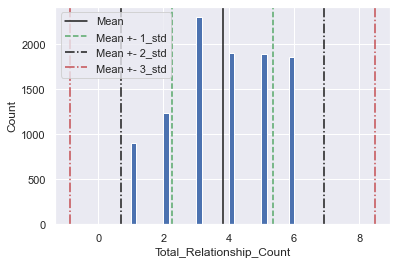

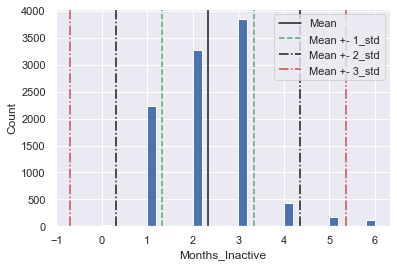

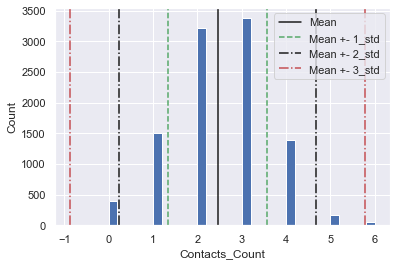

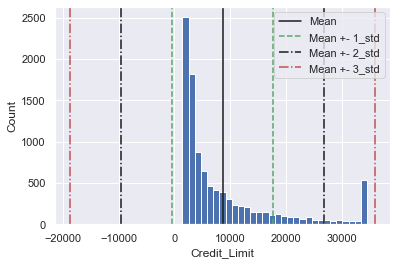

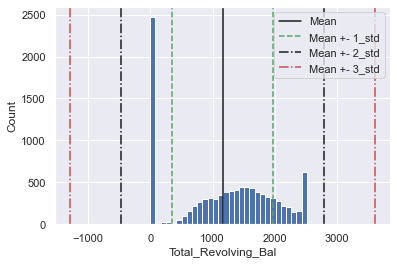

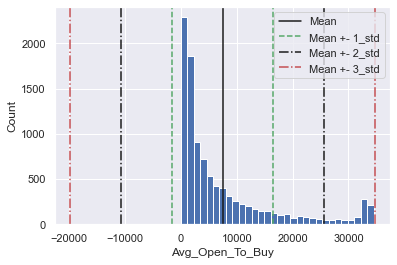

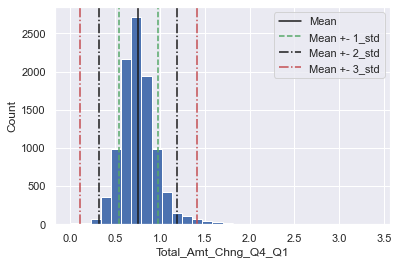

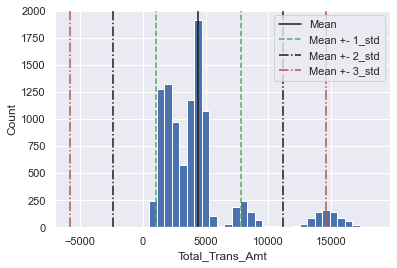

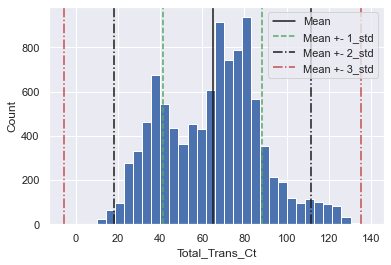

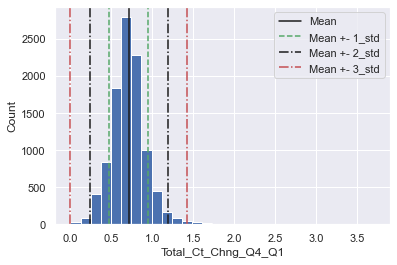

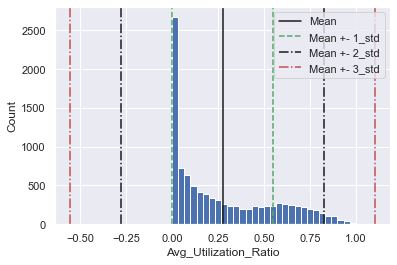

None


In [11]:
def visualizing_outliers(df, col_list):
    """
    Visualizing outliers by using histograms
    """
    for col in col_list:
        fig, ax =plt.subplots()
        ax.hist(df[col], bins=30)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.axvline(df[col].mean(), color='k', label='Mean')
        ax.axvline(df[col].mean() + df[col].std(), color='g', linestyle='--', label='Mean +- 1_std')
        ax.axvline(df[col].mean() - df[col].std(), color='g', linestyle='--')
        ax.axvline(df[col].mean() + 2*df[col].std(), color='k', linestyle='-.', label='Mean +- 2_std')
        ax.axvline(df[col].mean() - 2*df[col].std(), color='k', linestyle='-.')
        ax.axvline(df[col].mean() + 3*df[col].std(), color='r', linestyle='-.', label='Mean +- 3_std')
        ax.axvline(df[col].mean() - 3*df[col].std(), color='r', linestyle='-.')
        ax.legend()
        plt.show()
result = visualizing_outliers(df_EDA, df_EDA.select_dtypes('number').columns)
print(result)

In [12]:
# The null values before removing outliers
df_EDA.isna().sum()

Attrition_Flag              0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
# Detecting and removing outliers (standard daviation based detection)
def outlier_detection(df, col_list):
    """
    Detecting outliers of individual columns based on standard daviation based detection
    Removing outliers 
    """
    for col in col_list:
        min_value = df[col].min()
        max_value = df[col].max()
        mean_value = df[col].mean()
        std_value = df[col].std()
        cut_off = 3 * std_value
        lower_bound = mean_value - cut_off
        upper_bound = mean_value + cut_off
        if ((min_value < lower_bound) or (max_value > upper_bound)):
            print(f"Outlier detected in '{col}' column")
        df[col] = df.loc[(df[col]>lower_bound) & (df[col]<upper_bound), col]

In [14]:
# Calling outlier_detection function for all numeric columns
outlier_detection(df_EDA, df_EDA.select_dtypes('number').columns)

Outlier detected in 'Age' column
Outlier detected in 'Months_Inactive' column
Outlier detected in 'Contacts_Count' column
Outlier detected in 'Total_Amt_Chng_Q4_Q1' column
Outlier detected in 'Total_Trans_Amt' column
Outlier detected in 'Total_Trans_Ct' column
Outlier detected in 'Total_Ct_Chng_Q4_Q1' column


In [15]:
# Observing the null values after removing outliers
df_EDA.isna().sum()

Attrition_Flag                0
Age                           1
Gender                        0
Dependent_Count               0
Education                     0
Marital_Status                0
Income                        0
Card_Category                 0
Months_On_Book                0
Total_Relationship_Count      0
Months_Inactive             124
Contacts_Count               53
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1        163
Total_Trans_Amt             392
Total_Trans_Ct                2
Total_Ct_Chng_Q4_Q1         113
Avg_Utilization_Ratio         0
dtype: int64

In [16]:
# Dropping null values
df_EDA = df_EDA.dropna()

In [17]:
# Shape of the dataframe after removing null values
df_EDA.shape

(9307, 20)

## 5. Visualizing the correlation between columns

In [18]:
df_EDA.corr()

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Age,1.000000,-0.124607,0.786716,-0.021997,0.043826,-0.017508,0.003795,0.015231,0.002407,-0.082671,-0.028256,-0.051597,-0.030640,0.005095
Dependent_Count,-0.124607,1.000000,-0.105899,-0.043578,-0.003519,-0.045010,0.066942,-0.004218,0.067279,-0.030809,0.042612,0.060203,0.016530,-0.036625
Months_On_Book,0.786716,-0.105899,1.000000,-0.018471,0.063377,-0.010618,0.006047,0.007930,0.005322,-0.059107,-0.018319,-0.035893,-0.021561,-0.008316
Total_Relationship_Count,-0.021997,-0.043578,-0.018471,1.000000,-0.008831,0.056811,-0.058473,0.022957,-0.060520,0.047780,-0.343018,-0.205207,0.042029,0.060958
Months_Inactive,0.043826,-0.003519,0.063377,-0.008831,1.000000,0.028299,-0.019037,-0.043701,-0.015050,-0.021360,-0.039983,-0.052337,-0.041791,-0.010003
Contacts_Count,-0.017508,-0.045010,-0.010618,0.056811,0.028299,1.000000,0.023756,-0.045990,0.027922,-0.023684,-0.137458,-0.162917,-0.102043,-0.053567
Credit_Limit,0.003795,0.066942,0.006047,-0.058473,-0.019037,0.023756,1.000000,0.037855,0.995863,0.015173,0.134167,0.033549,-0.017214,-0.478132
Total_Revolving_Bal,0.015231,-0.004218,0.007930,0.022957,-0.043701,-0.045990,0.037855,1.000000,-0.053106,0.037479,0.044468,0.046382,0.085519,0.632831
Avg_Open_To_Buy,0.002407,0.067279,0.005322,-0.060520,-0.015050,0.027922,0.995863,-0.053106,1.000000,0.011755,0.130030,0.029307,-0.024979,-0.535346
Total_Amt_Chng_Q4_Q1,-0.082671,-0.030809,-0.059107,0.047780,-0.021360,-0.023684,0.015173,0.037479,0.011755,1.000000,0.108830,0.098606,0.307474,0.026038


<AxesSubplot:>

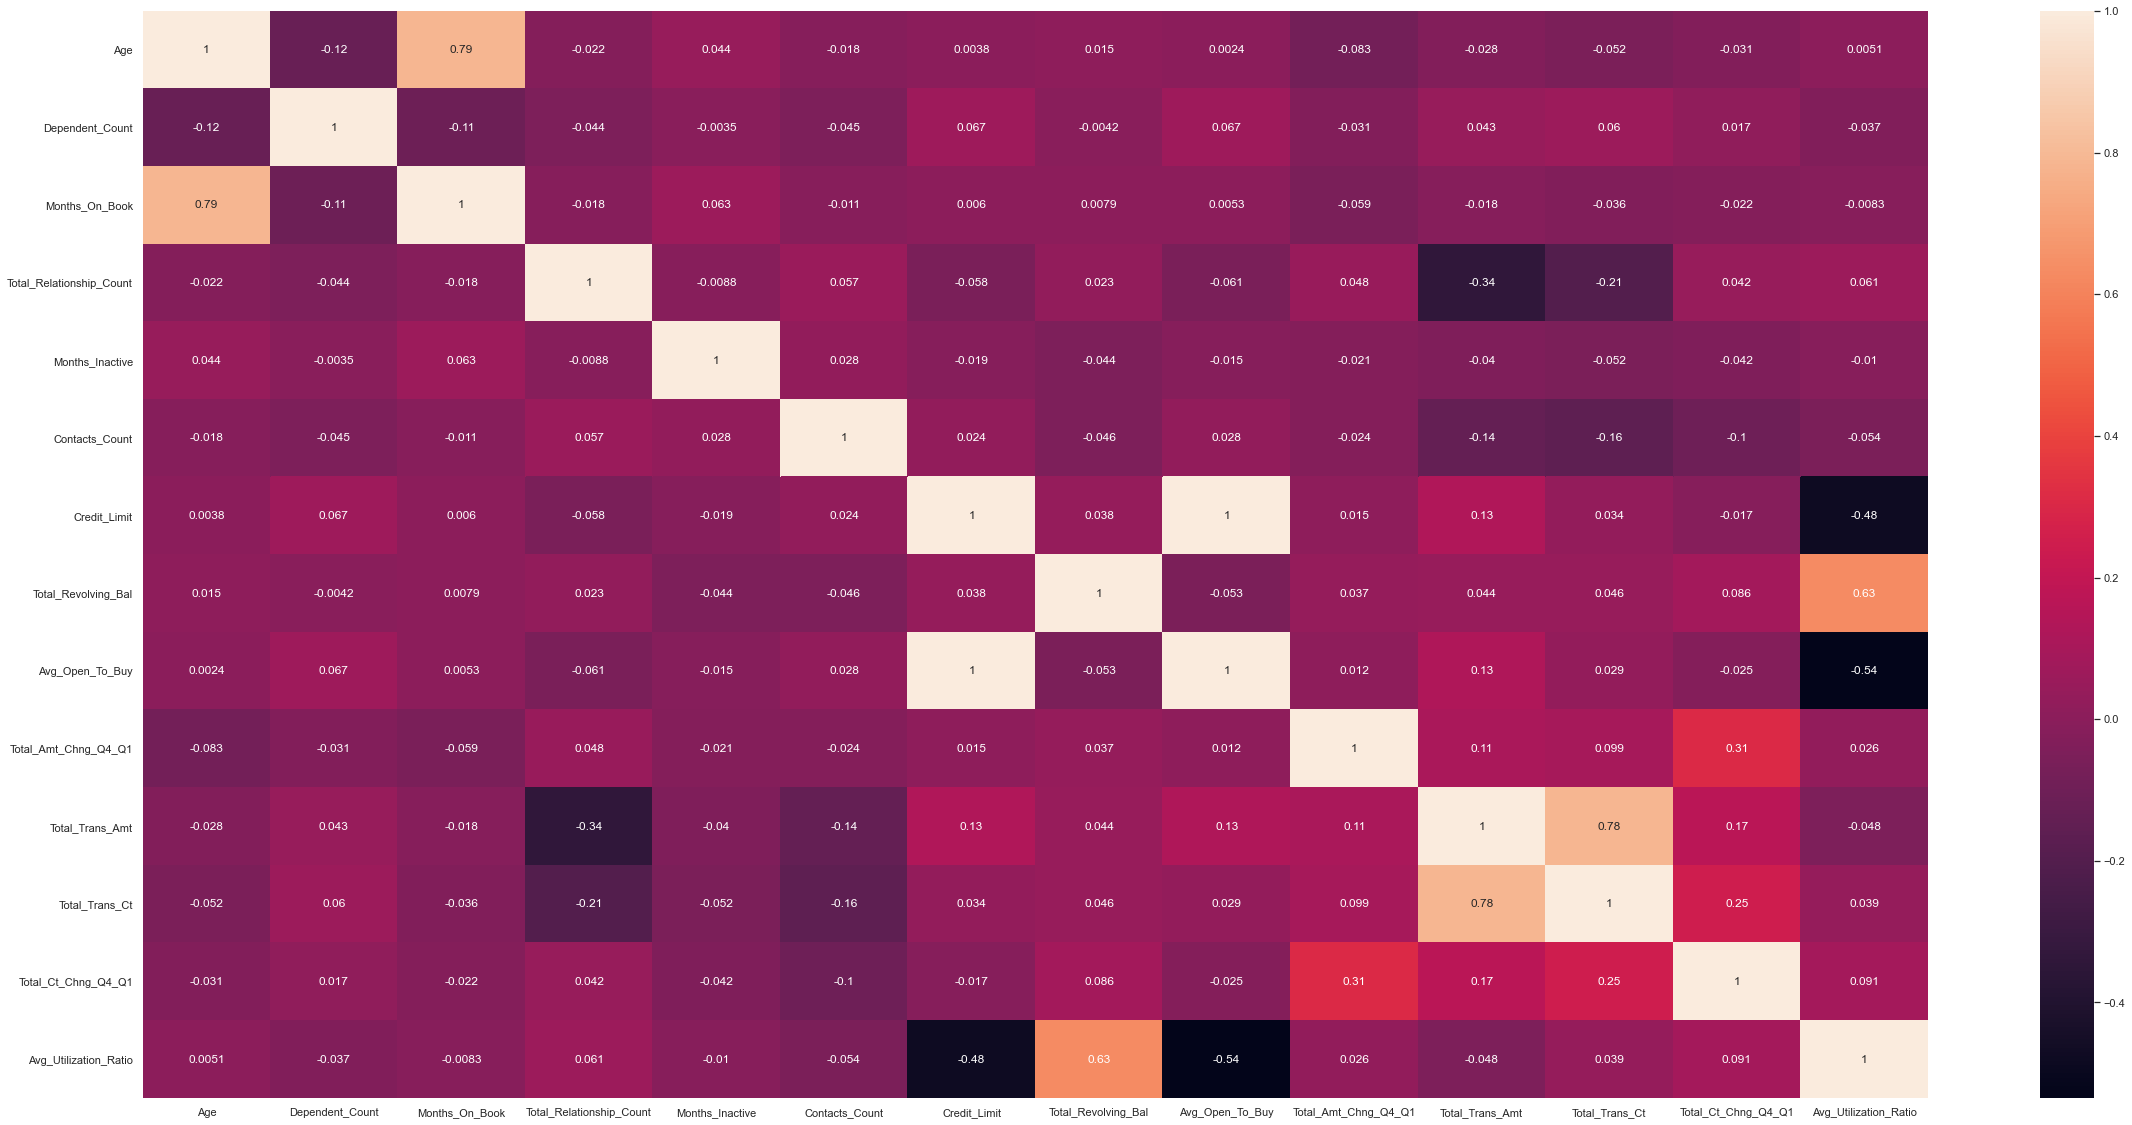

In [19]:
plt.figure(figsize=(40,20))
sns.heatmap(df_EDA.corr(), annot=True)

There is significant positive correlation between 'Credit_Limit' and 'Avg_Open_To_Buy' columns. Also there is a positive correlation between 'Credit_Limit' and 'Avg_open_to_buy' columns, between 'Age' and 'Months_On_Book' columns, between 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio' columns, and between 'Total_Trans_Amt' and 'Total_Trans_Ct' columns.

There is a negative correlation between 'Credit_Limit' and 'Avg_Utilization_Ratio' columns, between 'Avg_Open_To_Buy' and 'Credit_Limit' columns, between 'Total_Relationship_Count' and 'Total_Trans_Amt' columns.

Text(0, 0.5, 'Average open to buy')

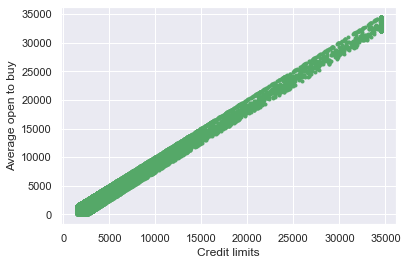

In [20]:
fig, ax = plt.subplots()
ax.plot(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'], marker='.', linestyle='None', color='g')
ax.set_xlabel('Credit limits')
ax.set_ylabel('Average open to buy')

In [21]:
# function to calculate the pearson correlation coefficient between two highly correlated attributes
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two columns."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
r = pearson_r(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'])
print(r)

0.9958628648448176


In [22]:
from scipy.stats.stats import pearsonr
print(pearsonr(df_EDA['Credit_Limit'], df_EDA['Avg_Open_To_Buy'])[0])

0.9958628648448173


## 6. Visualizing the distribution of categorical columns

In [23]:
df_EDA.select_dtypes('object').columns

Index(['Attrition_Flag', 'Gender', 'Education', 'Marital_Status', 'Income',
       'Card_Category'],
      dtype='object')

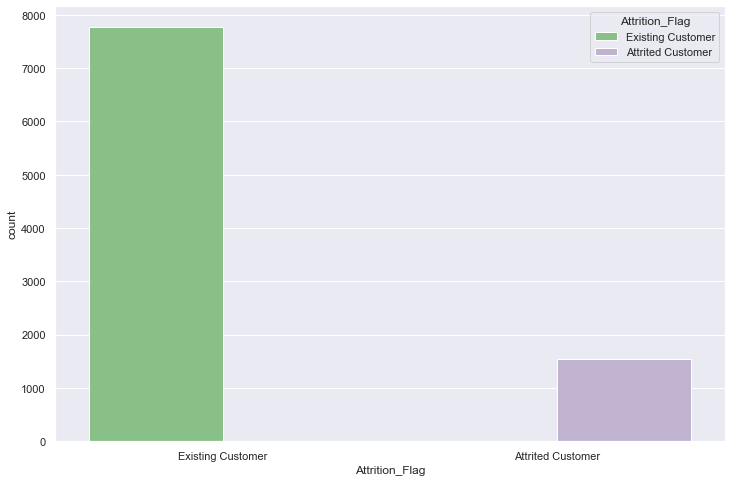

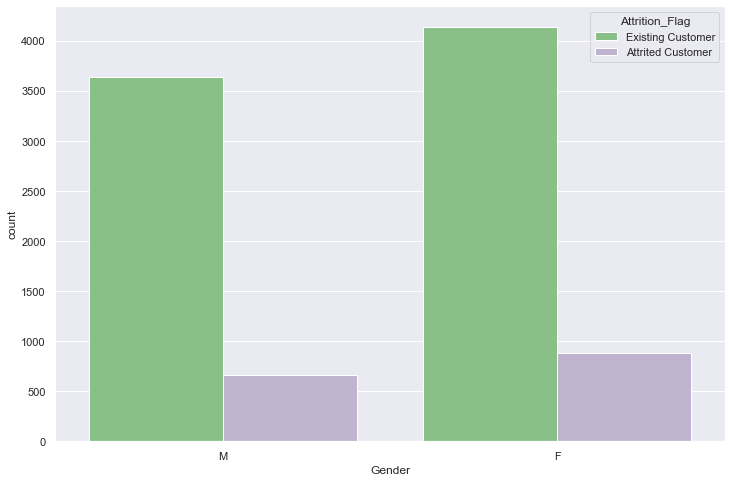

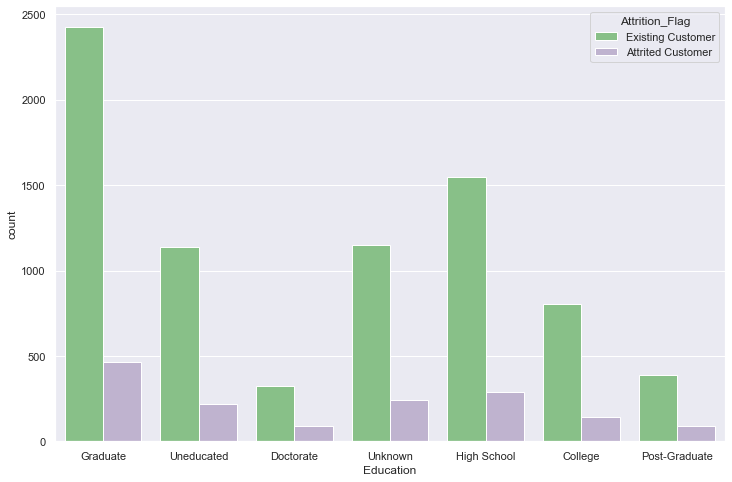

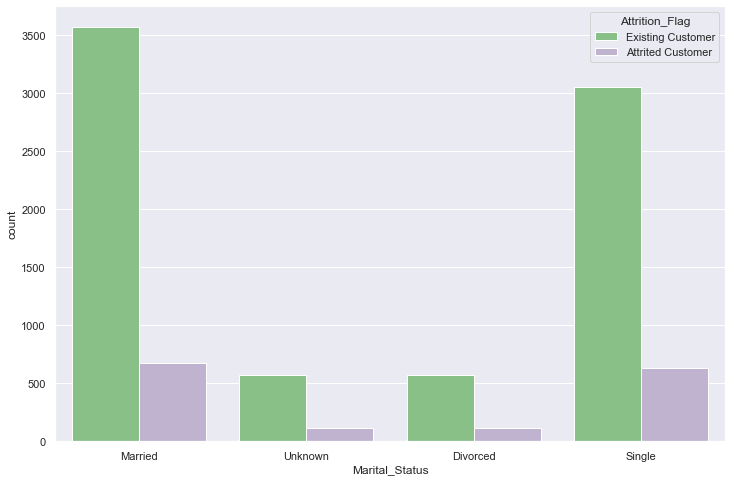

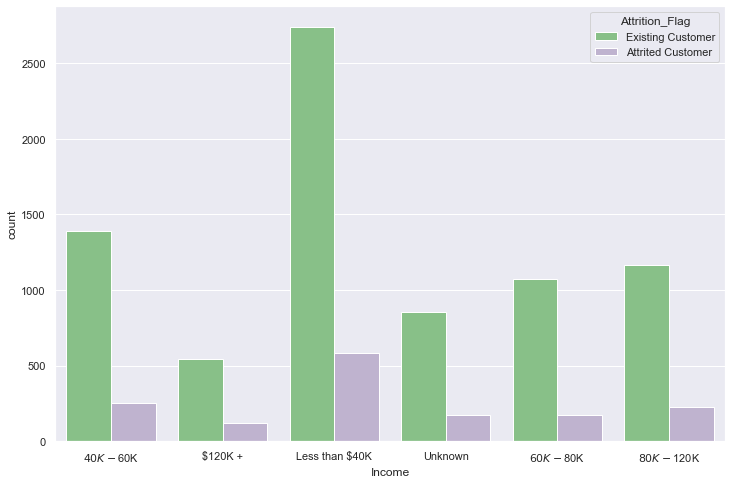

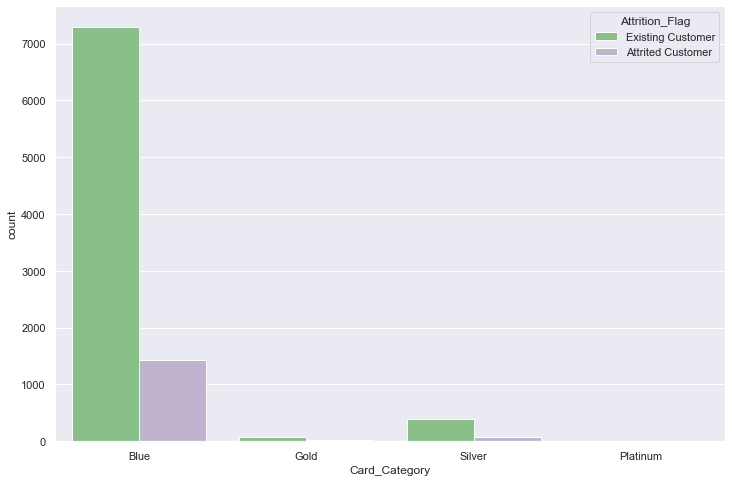

None


In [24]:
def count_plot(df, col_list):
    """
    visualizing the distribution of categorical columns
    """
    for col in col_list:
        plt.figure(figsize=(12,8))
        sns.countplot(x= col, data = df, hue='Attrition_Flag', palette='Accent')
        plt.show()
result = count_plot(df_EDA, df_EDA.select_dtypes('object').columns)
print(result)

In [25]:
df_EDA['Card_Category'].value_counts()

Blue        8726
Silver       470
Gold          94
Platinum      17
Name: Card_Category, dtype: int64

## 7. Saving the final dataframe

In [26]:
# Save the final dataframe to drive for preprocessing
df_EDA.to_csv('..\Dataset\df_preprocessing.csv')